In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

folder_path = os.getcwd()


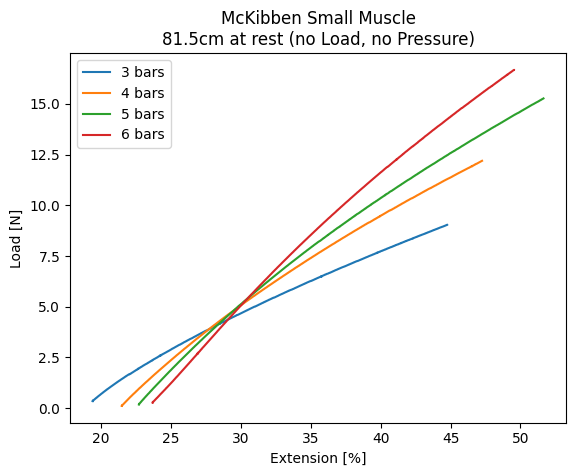

In [3]:
# Get all the .csv files in the current folder
csv_files = glob.glob(os.path.join(folder_path, 'McKibbenSmall', '*.csv'))

plt.figure()
plt.title("McKibben Small Muscle\n81.5cm at rest (no Load, no Pressure)")
stiffness_small = []

for i, csv_file in enumerate(csv_files):
#    # Read the .csv file into a pandas DataFrame
    df = pd.read_csv(csv_file)[1:].astype(float)
    name = os.path.basename(csv_file).split('.')[0]
    
    regression_model = LinearRegression(fit_intercept=False)
    regression_model.fit(df[['Extension']] / 1000.0, df['Load'])
    stiffness_small.append(regression_model.coef_[0])

    if   name == "3 bars":
        df['Extension'] = df['Extension'] + (81.5 - 65.7)
    elif name == "4 bars":
        df['Extension'] = df['Extension'] + (81.5 - 64.0)
    elif name == "5 bars":
        df['Extension'] = df['Extension'] + (81.5 - 63.0)
    elif name == "6 bars":
        df['Extension'] = df['Extension'] + (81.5 - 62.2)

    df['Extension'] = df['Extension'] / 81.5 * 100.0

    plt.plot(df['Extension'].to_list(), df['Load'].to_list(), label=name)
    
    plt.legend()
    plt.xlabel('Extension [%]')
    plt.ylabel('Load [N]')

plt.show()

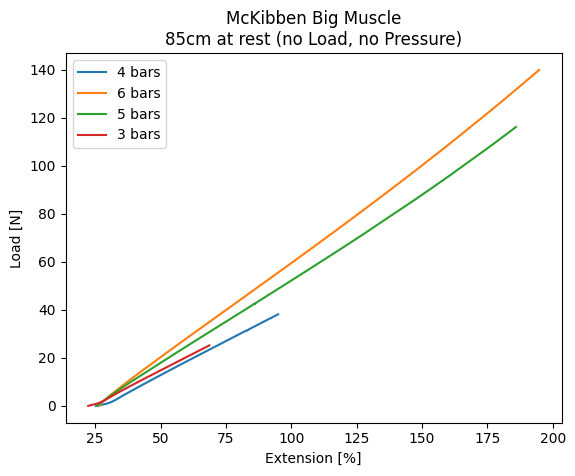

In [4]:
# Get all the .csv files in the current folder
csv_files = glob.glob(os.path.join(folder_path, 'McKibbenBig', '*.csv'))

plt.figure()
plt.title("McKibben Big Muscle\n85cm at rest (no Load, no Pressure)")
stiffness_big = []

for i, csv_file in enumerate(csv_files):
#    # Read the .csv file into a pandas DataFrame
    df = pd.read_csv(csv_file)[1:].astype(float)
    name = os.path.basename(csv_file).split('.')[0]

    regression_model = LinearRegression(fit_intercept=False)
    regression_model.fit(df[['Extension']] / 1000.0, df['Load'])
    stiffness_big.append(regression_model.coef_[0])

    if   name == "3 bars":
        df['Extension'] = df['Extension'] + (85.0 - 66.0)
    elif name == "4 bars":
        df['Extension'] = df['Extension'] + (85.0 - 63.5)
    elif name == "5 bars":
        df['Extension'] = df['Extension'] + (85.0 - 63.0)
    elif name == "6 bars":
        df['Extension'] = df['Extension'] + (85.0 - 62.4)

    df['Extension'] = df['Extension'] / 85.0 * 100.0

    plt.plot(df['Extension'].to_list(), df['Load'].to_list(), label=name)
    
    plt.legend()
    plt.xlabel('Extension [%]')
    plt.ylabel('Load [N]')

plt.show()

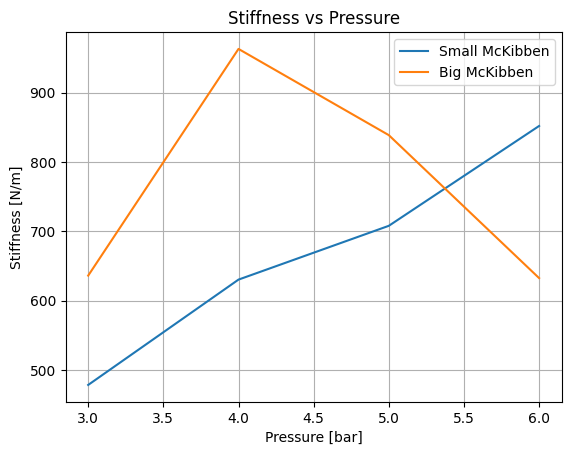

In [6]:
plt.figure()
plt.plot([3, 4, 5, 6], stiffness_small, label="Small McKibben")
plt.plot([3, 4, 5, 6], stiffness_big, label="Big McKibben")
plt.xlabel('Pressure [bar]')
plt.ylabel('Stiffness [N/m]')
plt.legend()
plt.grid()
plt.title("Stiffness vs Pressure")
plt.show()
# units